In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [21]:
!kaggle datasets download -d sunilthite/cat-or-dog-image-classification

Dataset URL: https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification
License(s): other
cat-or-dog-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import os

# Create a directory to store the dataset if it doesn't exist
os.makedirs('cat_or_dog_dataset', exist_ok=True)

# Extract the dataset
!unzip cat-or-dog-image-classification.zip -d cat_or_dog_dataset


Streaming output truncated to the last 5000 lines.
  inflating: cat_or_dog_dataset/Train/Dog/dog.5146.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5147.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5148.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5149.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.515.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5150.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5151.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5153.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5154.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5155.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5156.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5157.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5158.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5159.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.516.jpg  
  inflating: cat_or_dog_dataset/Train/Dog/dog.5160.jpg  
  inflating: cat_or_dog_dataset/Train/D

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier
from skimage.feature import hog


In [15]:
# Function to load images and labels
def load_images_and_labels(data_dir, categories):
    images = []
    labels = []
    for label in categories:
        class_dir = os.path.join(data_dir, label)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to reduce computation
            images.append(img)
            labels.append(0 if label == 'Cat' else 1)
    return np.array(images), np.array(labels)

In [16]:
# Load train and test datasets
train_images, train_labels = load_images_and_labels('/content/cat_or_dog_dataset/Train', ['Cat', 'Dog'])
test_images, test_labels = load_images_and_labels('/content/cat_or_dog_dataset/Test', ['Cat', 'Dog'])

In [17]:
# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for img in images:
        hog_feature = hog(img, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=False, multichannel=True)
        hog_features.append(hog_feature)
    return np.array(hog_features)


In [18]:
# Extract HOG features
train_features = extract_hog_features(train_images)
test_features = extract_hog_features(test_images)

<ipython-input-17-6570fb5f0fcc>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(img, pixels_per_cell=(8, 8),


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features)
X_test = scaler.transform(test_features)

# Train the SVM model with SGD
svm_sgd = SGDClassifier(max_iter=10, random_state=42)  # Set max_iter to 10
svm_sgd.fit(X_train, train_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      1944
           1       0.68      0.69      0.69      1919

    accuracy                           0.69      3863
   macro avg       0.69      0.69      0.69      3863
weighted avg       0.69      0.69      0.69      3863

Accuracy Score: 0.6870308050737769


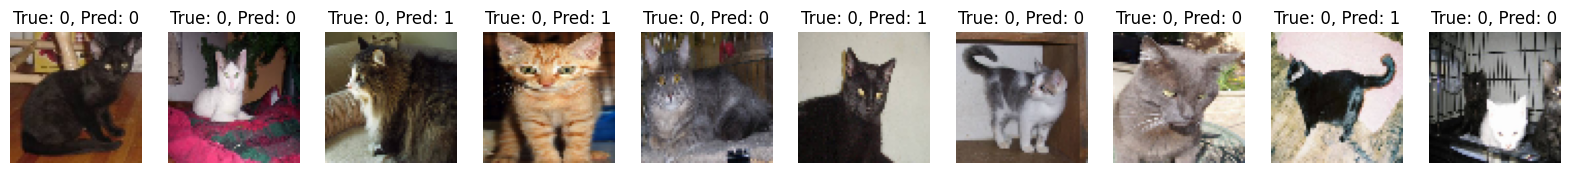

In [20]:
# Predict the labels on the test set
y_pred = svm_sgd.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:\n", classification_report(test_labels, y_pred))
print("Accuracy Score:", accuracy_score(test_labels, y_pred))

# Example to show some predictions
def plot_sample_images(images, labels, predictions, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"True: {labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Show sample predictions
plot_sample_images(test_images[:10], test_labels[:10], y_pred[:10])
